Imports

In [50]:
import random
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt

random.seed(1)

Data

In [51]:
random.seed(1)
X = np.array([random.gauss(0, 1) for _ in range(100)])
eps = np.array([random.gauss(0, sqrt(0.25)) for _ in range(100)])

Y = -1 + 0.5*X + eps

Metrics

In [52]:
def mse(y_true, y_pred):
    return sum((y_true - y_pred)**2) / len(y_true)

def tss(y_true):
    return sum((y_true - y_true.mean())**2)

def rss(y_true, y_pred):
    return sum((y_true - y_pred)**2)

def r_squared(y_true, y_pred):
    return 1 - rss(y_true, y_pred) / tss(y_true)

Linear Regression

In [53]:
def calc_estimators(X, Y):
    beta_1 = sum((X - np.mean(X))* (Y - Y.mean())) / sum((X - X.mean())**2)
    beta_0 = Y.mean() - beta_1 * X.mean()
    return beta_0, beta_1

In [54]:
print(f"beta_0 = -1, beta_1 = 0.5")
beta_0, beta_1 = calc_estimators(X, Y)
print(f"beta'_0 = {beta_0:.4f}, beta'_1 = {beta_1:.4f}")

beta_0 = -1, beta_1 = 0.5
beta'_0 = -0.7774, beta'_1 = 0.3615


Relationship

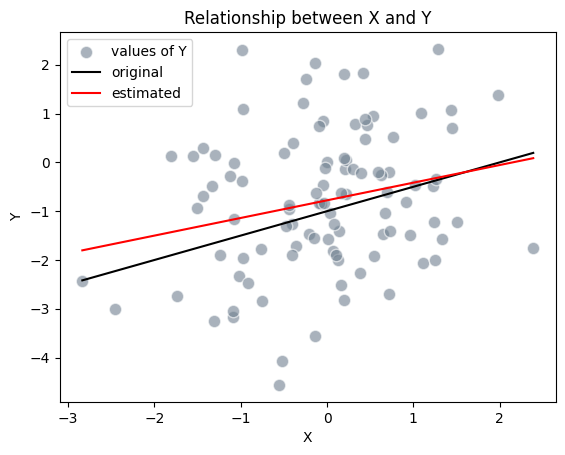

Original MSE: 1.9876392627842596
Estimated MSE: 1.9180005376979559
Original R^2: 0.0224541797802581
Estimated R^2: 0.056703374746445934


In [55]:
x_values = np.linspace(min(X), max(X), 100)
original_values = -1 + 0.5 * x_values
estimated_values = beta_0 + beta_1 * x_values

plt.scatter(X, Y, color="slategrey", alpha=0.6, edgecolors="w", s=80, label="values of Y")
plt.plot(x_values, original_values, color="black", label=f"original")
plt.plot(x_values, estimated_values, color="red", label=f"estimated")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Relationship between X and Y")
plt.legend()
plt.show()


print(f"Original MSE: {mse(Y, -1 + 0.5*X)}")
print(f"Estimated MSE: {mse(Y, beta_0 + beta_1*X)}")

print(f"Original R^2: {r_squared(Y, -1 + 0.5*X)}")
print(f"Estimated R^2: {r_squared(Y, beta_0 + beta_1*X)}")

Polynomial regression
$$
\begin{bmatrix}
y_1 \\
y_2 \\
y_3 \\
\vdots \\
y_n
\end{bmatrix}
=
\begin{bmatrix}
1 & x_1 & x_1^2 & \cdots & x_1^m \\
1 & x_2 & x_2^2 & \cdots & x_2^m \\
1 & x_3 & x_3^2 & \cdots & x_3^m \\
\vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_n & x_n^2 & \cdots & x_n^m
\end{bmatrix}
\begin{bmatrix}
\beta_0 \\
\beta_1 \\
\beta_2 \\
\vdots \\
\beta_m
\end{bmatrix}
+
\begin{bmatrix}
\epsilon_1 \\
\epsilon_2 \\
\epsilon_3 \\
\vdots \\
\epsilon_n
\end{bmatrix}
$$

$$
\hat{\beta} = (X^TX)^{-1}X^Ty
$$


In [99]:
def regression(X, Y, k=1):
    X_matrix = np.column_stack([X**i for i in range(k + 1)])
    beta_vector = np.matmul(
        np.linalg.inv(np.matmul(X_matrix.transpose(), X_matrix)),
        np.matmul(X_matrix.transpose(), Y),
    )
    return beta_vector

In [102]:
def calc_standard_errors(X, eps_var):
    n = len(X)
    x_mean = X.mean()
    sum_of_squares = sum((X - x_mean)**2)
    se_b0 = np.sqrt(eps_var * (1/n + x_mean**2 / sum_of_squares))
    se_b1 = np.sqrt(eps_var / sum_of_squares)
    return se_b0, se_b1

Var[eps]: 0.01
	Original:
		β: [-1, 0.5]
		MSE: 0.010 	R^2: 0.955
	Linear:
		β: [-0.984, 0.490]
		β0 conf: [-1.004, -0.964 ] 	β1 conf: [0.469, 0.511 ]
		MSE: 0.010, 	R^2: 0.957
	Polynomial:
		β: [-0.9797695   0.48856914 -0.00516902]
		MSE: 0.010 	R^2: 0.957
Var[eps]: 0.25
	Original:
		β: [-1, 0.5]
		MSE: 0.248 	R^2: 0.407
	Linear:
		β: [-0.921, 0.451]
		β0 conf: [-1.021, -0.821 ] 	β1 conf: [0.345, 0.557 ]
		MSE: 0.240, 	R^2: 0.428
	Polynomial:
		β: [-0.8988475   0.44284569 -0.02584511]
		MSE: 0.239 	R^2: 0.431
Var[eps]: 2
	Original:
		β: [-1, 0.5]
		MSE: 1.988 	R^2: 0.022
	Linear:
		β: [-0.777, 0.362]
		β0 conf: [-1.061, -0.494 ] 	β1 conf: [0.060, 0.663 ]
		MSE: 1.918, 	R^2: 0.057
	Polynomial:
		β: [-0.71389751  0.3383432  -0.07310101]
		MSE: 1.909 	R^2: 0.061


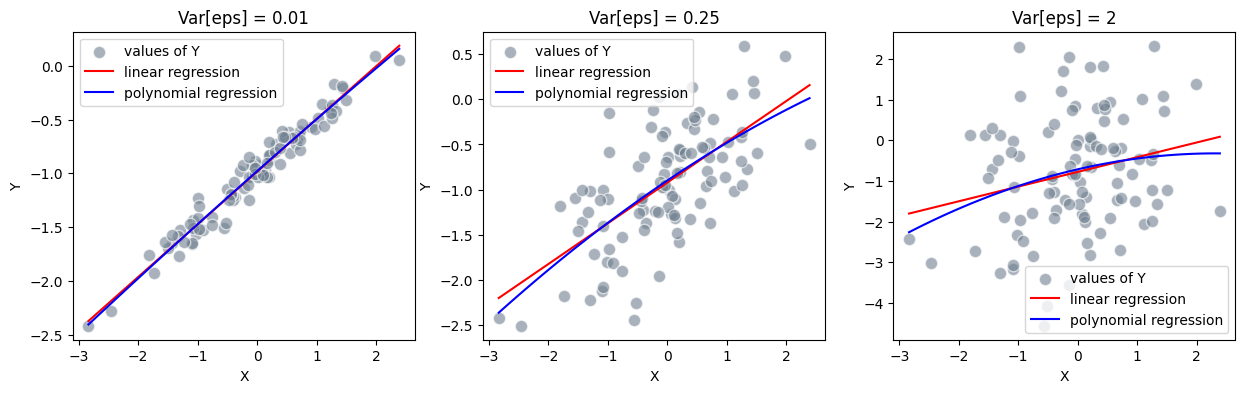

In [103]:
k = 2
variances = [0.01, 0.25, 2]

fig = plt.figure(figsize=(15, 4))
for i in range(3):
    random.seed(1)
    X = np.array([random.gauss(0, 1) for _ in range(100)])
    eps = np.array([random.gauss(0, sqrt(variances[i])) for _ in range(100)])
    Y = -1 + 0.5 * X + eps

    beta_0, beta_1 = regression(X, Y)
    beta_vector = regression(X, Y, k)

    se_b0, se_b1 = calc_standard_errors(X, variances[i])

    x_values = np.linspace(min(X), max(X), 100)
    original_values = -1 + 0.5 * x_values
    estimated_1d_values = beta_0 + beta_1 * x_values
    estimated_kd_values = sum([beta_vector[i] * x_values**i for i in range(k + 1)])

    fig.add_subplot(1, 3, i + 1)
    plt.scatter(X, Y, color="slategrey", alpha=0.6, edgecolors="w", s=80, label="values of Y")
    # plt.plot(x_values, original_values, color="black", label=f"original")
    plt.plot(x_values, estimated_1d_values, color="red", label=f"linear regression")
    plt.plot(x_values, estimated_kd_values, color="blue", label=f"polynomial regression")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"Var[eps] = {variances[i]}")
    plt.legend()
    print(f"Var[eps]: {variances[i]}")
    print("\tOriginal:")
    print(f"\t\t\u03B2: [-1, 0.5]")
    print(f"\t\tMSE: {mse(Y, -1 + 0.5*X):.3f} \tR^2: {r_squared(Y, -1 + 0.5*X):.3f}")
    print("\tLinear:")
    print(f"\t\t\u03B2: [{beta_0:.3f}, {beta_1:.3f}]")
    print(f"\t\t\u03B20 conf: [{beta_0 - 2*se_b0:.3f}, {beta_0 + 2*se_b0:.3f} ] \t\u03B21 conf: [{beta_1 - 2*se_b1:.3f}, {beta_1 + 2*se_b1:.3f} ]")
    print(f"\t\tMSE: {mse(Y, beta_0 + beta_1*X):.3f}, \tR^2: {r_squared(Y, beta_0 + beta_1*X):.3f}")
    print("\tPolynomial:")
    print(f"\t\t\u03B2: {beta_vector}")
    print(
        f"\t\tMSE: {mse(Y, sum([beta_vector[i] * X**i for i in range(k+1)])):.3f} \tR^2: {r_squared(Y, sum([beta_vector[i] * X**i for i in range(k+1)])):.3f}"
    )
plt.show()